In [1]:
import numpy as np
from util import *
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.animation as animation
import time
import datetime as dt


In [54]:
T = np.array([[0,1,2],[3,4,5],[6,7,8]])
T_f = T.flatten()
T_f

T.argmax()
T.argmin()
T.any()
T.all(axis=1)
T.argpartition(2)
T.astype(str)
M = T


F = T.flatten()
S = F
F.clip(2,5)

array([2, 2, 2, 3, 4, 5, 5, 5, 5])

In [55]:
M_f = S
M,M_f,

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))

In [56]:
S = M.copy()
R = M
S

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [57]:
M[0][0]=3
M.min()
#M.fill(3)
L = M.tolist()

In [58]:
L.append(6)

In [59]:
L

[[3, 1, 2], [3, 4, 5], [6, 7, 8], 6]

In [60]:
L.append('Salut')
L

[[3, 1, 2], [3, 4, 5], [6, 7, 8], 6, 'Salut']

In [62]:
M

array([[3, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [61]:
M.trace()

15

In [63]:
M.transpose()

array([[3, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [71]:
M.tofile("jaafar.csv",sep=',',format='%s')

In [131]:
Data_array = np.genfromtxt("load_avg_1.csv",delimiter=';')

In [135]:

dframe = DataFrame.from_csv("load.csv")
dframe_perc = DataFrame.from_csv("load_per.csv")

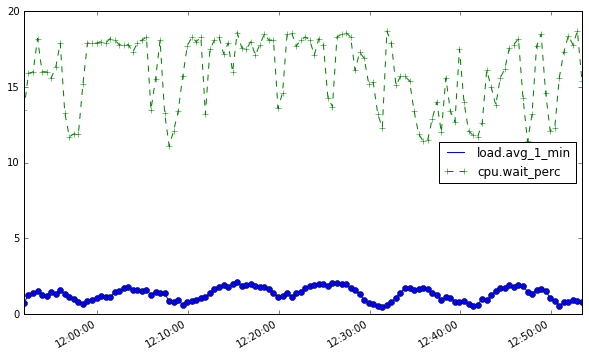

In [150]:
dframe['load.avg_1_min'].plot(figsize=(10,6),legend=True,linestyle='-',marker='o')
dframe['cpu.wait_perc'].plot(figsize=(10,6),legend=True,linestyle='--',marker='+')

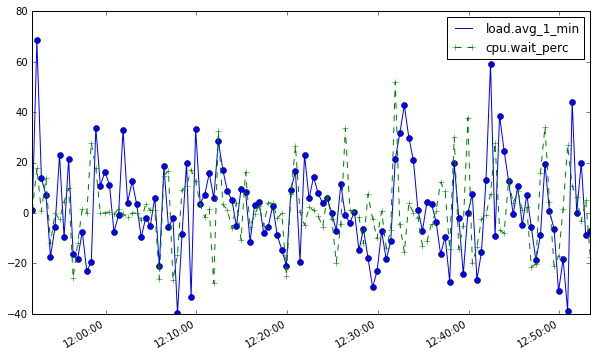

In [149]:
dframe_perc['load.avg_1_min'].plot(figsize=(10,6),legend=True,linestyle='-',marker='o')
dframe_perc['cpu.wait_perc'].plot(figsize=(10,6),legend=True,linestyle='--',marker='+')

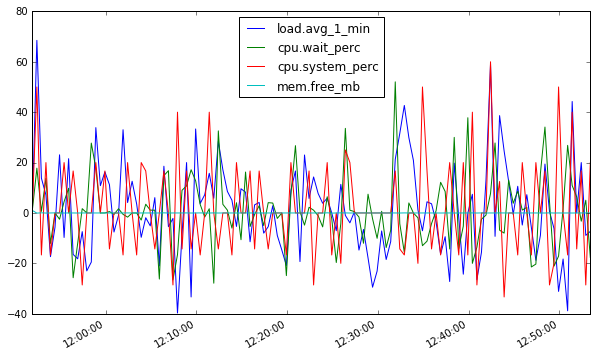

In [152]:
dframe_perc.plot(figsize=(10,6))

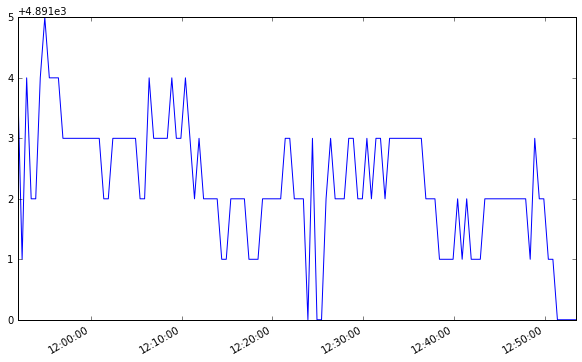

In [153]:
dframe['mem.free_mb'].plot(figsize=(10,6))

In [129]:
dframe.corr(method='pearson', min_periods=1)

,load.avg_1_min,cpu.wait_perc,cpu.system_perc,mem.free_mb
load.avg_1_min,1.000000,0.274966,0.146051,-0.005196
cpu.wait_perc,0.274966,1.000000,0.044510,-0.018168
cpu.system_perc,0.146051,0.044510,1.000000,-0.019900
mem.free_mb,-0.005196,-0.018168,-0.019900,1.000000


In [156]:
previous_id = lag(dframe)

NameError: name 'lag' is not defined

In [182]:
dframe.head()

,load.avg_1_min,cpu.wait_perc,cpu.system_perc,mem.free_mb,load.avg_1_min_shift
2016-09-01 11:51:54.709,0.73,13.5,0.4,4895,1.40
2016-09-01 11:52:24.740,1.23,15.9,0.6,4892,1.50
2016-09-01 11:52:54.713,1.40,16.0,0.5,4895,1.24
2016-09-01 11:53:24.741,1.50,18.2,0.6,4893,1.17
2016-09-01 11:53:54.712,1.24,16.0,0.5,4893,1.44


In [183]:
window = 2
dframe['load.avg_1_min_shift'] = dframe['load.avg_1_min'].shift(-window)
dframe.head()

,load.avg_1_min,cpu.wait_perc,cpu.system_perc,mem.free_mb,load.avg_1_min_shift
2016-09-01 11:51:54.709,0.73,13.5,0.4,4895,1.40
2016-09-01 11:52:24.740,1.23,15.9,0.6,4892,1.50
2016-09-01 11:52:54.713,1.40,16.0,0.5,4895,1.24
2016-09-01 11:53:24.741,1.50,18.2,0.6,4893,1.17
2016-09-01 11:53:54.712,1.24,16.0,0.5,4893,1.44


In [184]:
dframe.corr(method='spearman', min_periods=3)
dframe.corrwith(dframe['load.avg_1_min_shift'])

load.avg_1_min          0.760570
cpu.wait_perc           0.379040
cpu.system_perc        -0.034238
mem.free_mb            -0.099776
load.avg_1_min_shift    1.000000
dtype: float64

In [185]:
# dframe = dframe.drop('load.avg_1_min_shit',1)

In [205]:
dframe['load.avg_1_min_roll'] = pd.rolling_mean(dframe['load.avg_1_min'],10)

In [195]:
dframe.head()

,load.avg_1_min,cpu.wait_perc,cpu.system_perc,mem.free_mb,load.avg_1_min_shift,load.avg_1_min_roll
2016-09-01 11:51:54.709,0.73,13.5,0.4,4895,1.40,NaN
2016-09-01 11:52:24.740,1.23,15.9,0.6,4892,1.50,NaN
2016-09-01 11:52:54.713,1.40,16.0,0.5,4895,1.24,1.120000
2016-09-01 11:53:24.741,1.50,18.2,0.6,4893,1.17,1.376667
2016-09-01 11:53:54.712,1.24,16.0,0.5,4893,1.44,1.380000


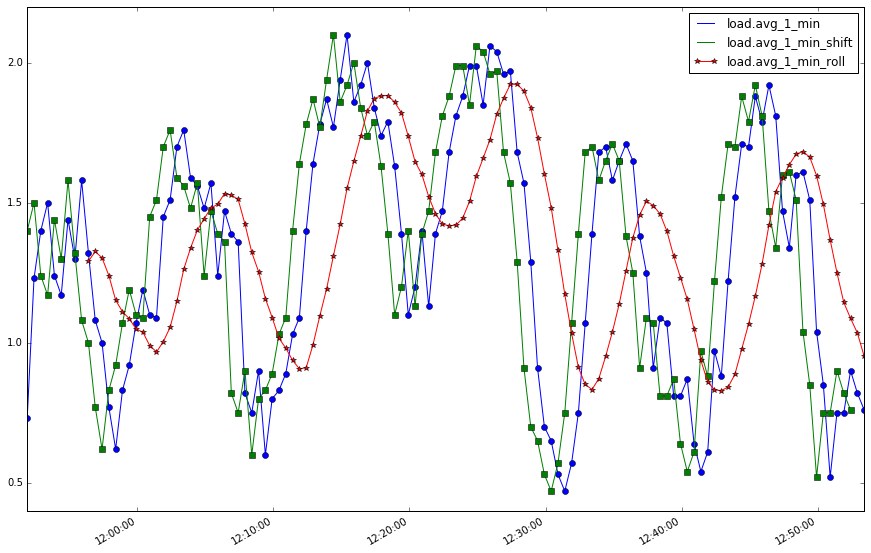

In [211]:
dframe['load.avg_1_min'].plot(figsize=(15,10),legend=True,linestyle='-',marker='o')
dframe['load.avg_1_min_shift'].plot(figsize=(15,10),legend=True,linestyle='-',marker='s')
dframe['load.avg_1_min_roll'].plot(figsize=(15,10),legend=True,linestyle='-',marker='*')

In [19]:
arr = np.array(np.arange(1,10,1))

In [25]:
arr = 'aaa bbb ccc dddd'.split('ccc')


In [26]:
arr

['aaa bbb ', ' dddd']